## Logistic Regression 

We are going to do **binary classification**, so the value of y (true/target) is going to be either 1 or 0. 
Linear regression is one of the most commonly used classification algotrithms. 

**Procedure:**

     Sigmoid function 
     Hypthesis function 
     Decision boundary 
     Logloss function 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

dtype('float64')

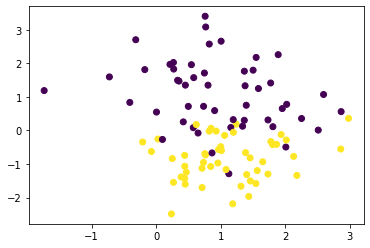

In [2]:
X, y = make_classification(n_features=3, n_redundant=0, n_informative=3, random_state=1, n_clusters_per_class=1)
y = np.array(y, dtype=int)
X = np.array(X, dtype=float)
plt.scatter(X[:, 0], X[:, 1], c=y)
X.dtype

In [3]:
def normalize(X):
    m, n = X.shape
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

### Sigmoid or Logistic function

For binary classification, we want the the hypothesis function to output values between 0 and 1. This is why we need the sigmoid function. This function squishes all its inputs between 0 and 1. 

In [4]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [16]:
z = w.X + b 

NameError: name 'w' is not defined

In [17]:
y_hat = sigmoid(z)

NameError: name 'z' is not defined

### Loss/Cost function

For every parametric machine learning algorithm, we need a loss function, which we want to minimize(find the global minimum) to determinate the optimal parameters **w** and **b** which will help us make the best predictions. 

In [8]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss 

### Gradient descent 

In [9]:
def gradient_descent(X, y, y_hat):
    
    # Number of training examples
    m = X.shape[0] 
    
    # Gradient of loss weights
    dw = (1/m)*np.dot(X.T, (y_hat-y))
    
    # Gradient of loss bias
    db = (1/m)*np.sum(X.T, (y_hat-y))
    
    return dw, db

### Decision boundary

In [10]:
def plot_decision_boundary(X, w, b): 
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    X2 = m*x1 + c 
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

### Train function 

In [21]:
def train(X, y, bs, epochs, lr):
    m, n = X.shape
    
    # Initilizing  
    w = np.zeros((n, 1))
    b = 0 
    y = y.reshape(m, 1)
    
    # normalizing input data 
    x = normalize(X)
    # Empty list to store losses 
    losses = []
    
    # Training loop
    for epoch in range(epochs):
        for i in range ((m-1)//bs + 1):
            
            # Defining batches 
            start_i = i*bs
            end_i = start_i + bs 
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # calculation hypothesis/predicition 
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of the loss function
            dw, db = gradient_descent(xb, yb, y_hat)
            
            # Updating the parameters
            w -= lr*dw 
            b -= lr*db
            
        # Calculating the loss 
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(1)
        
    return w, b, losses

### Predict function 


In [22]:
def predict(X):
    
    # Normalizing the inputs 
    x = normalize(X)
    
    # Calculting predictions 
    preds = sigmoid(np.dot(x, w) + b)
    
    # Empty list to store predicitions 
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

### Training and plotting data

In [23]:
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)

plot_decision_boundary(X, w, b)

TypeError: only integer scalar arrays can be converted to a scalar index